In [3]:
!pip -q install mpmath ripser persim numpy matplotlib


In [2]:
import numpy as np
import mpmath as mp

mp.mp.dps = 50  # precision; can increase if needed

N = 1000
gammas = np.array([float(mp.im(mp.zetazero(n))) for n in range(1, N+1)], dtype=np.float64)

gammas[:5], gammas[-1]


(array([14.13472514, 21.02203964, 25.01085758, 30.42487613, 32.93506159]),
 1419.4224809459956)

In [3]:
gaps = np.diff(gammas)

# local mean density factor ~ (log(t/2π))/(2π)
t = gammas[:-1]
density_factor = np.log(t / (2*np.pi)) / (2*np.pi)

unfolded_gaps = gaps * density_factor

print("Unfolded gaps summary:", np.mean(unfolded_gaps), np.std(unfolded_gaps))
unfolded_gaps[:10]


Unfolded gaps summary: 0.9989016218845007 0.37951321289367906


array([0.88871193, 0.76669278, 1.19033632, 0.630178  , 1.22634011,
       0.94874068, 0.71819605, 1.43763115, 0.57239955, 1.05288842])

In [13]:
def sliding_window(x, m=5, stride=3):
    x = np.asarray(x)
    n = (len(x) - m) // stride + 1
    return np.array([x[i*stride:i*stride+m] for i in range(n)], dtype=np.float64)

m = 5
stride = 3
X = sliding_window(unfolded_gaps, m=m, stride=stride)

# Standardize each coordinate (helps Rips complexes behave more stably)
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)

X.shape



(332, 5)

In [14]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

result = ripser(X, maxdim=3, n_perm = 200)
  # if slow: ripser(X, maxdim=1, n_perm=400)
diagrams = result["dgms"]

diagrams


[array([[0.        , 0.84814161],
        [0.        , 0.85237527],
        [0.        , 0.85500485],
        [0.        , 0.86232001],
        [0.        , 0.8638441 ],
        [0.        , 0.86431837],
        [0.        , 0.8704071 ],
        [0.        , 0.87090653],
        [0.        , 0.87179136],
        [0.        , 0.87201309],
        [0.        , 0.87205374],
        [0.        , 0.87263793],
        [0.        , 0.87567359],
        [0.        , 0.87886333],
        [0.        , 0.8795377 ],
        [0.        , 0.87992942],
        [0.        , 0.88267446],
        [0.        , 0.88536513],
        [0.        , 0.8917945 ],
        [0.        , 0.89577514],
        [0.        , 0.90005869],
        [0.        , 0.90403509],
        [0.        , 0.90533412],
        [0.        , 0.90701437],
        [0.        , 0.90801042],
        [0.        , 0.91230625],
        [0.        , 0.91339797],
        [0.        , 0.91348499],
        [0.        , 0.91424042],
        [0.   

In [15]:
H1 = diagrams[1]
if len(H1) > 0:
    lifetimes = H1[:,1] - H1[:,0]
    lifetimes = lifetimes[np.isfinite(lifetimes)]
    print("H1 features:", len(lifetimes))
    print("Top 10 lifetimes:", np.sort(lifetimes)[-300:])
    print("Mean lifetime:", np.mean(lifetimes))
else:
    print("No H1 features found (with current embedding/scale).")


H1 features: 153
Top 10 lifetimes: [0.00103474 0.00122213 0.00179541 0.00299835 0.00526392 0.00606894
 0.00694382 0.00849199 0.00876236 0.00893641 0.01246631 0.01336515
 0.01374078 0.01424813 0.01798725 0.01862669 0.01871502 0.02172661
 0.02470016 0.02658224 0.02687132 0.0289036  0.03112125 0.03447747
 0.03660333 0.03726029 0.03801286 0.03807139 0.04240704 0.04380703
 0.04512846 0.04634404 0.05057728 0.05154693 0.05185354 0.05449402
 0.05612171 0.0563966  0.0591644  0.06366193 0.06491578 0.06792188
 0.06830049 0.06850851 0.06988001 0.07361603 0.07394361 0.07422698
 0.07475114 0.07630074 0.07853734 0.0798254  0.08663857 0.08780015
 0.08883321 0.08960509 0.09006965 0.09081388 0.09125948 0.09187114
 0.09189558 0.09505689 0.09754193 0.09865737 0.10012937 0.10128355
 0.10459399 0.1047523  0.10506439 0.10672855 0.11125982 0.11318791
 0.11412156 0.11483955 0.12057006 0.12277663 0.12358558 0.12465084
 0.12682605 0.12740684 0.12984204 0.13073874 0.1310823  0.13148916
 0.13306057 0.1363591  0.14

In [30]:
np.random.permutation(unfolded_gaps)


array([1.16528512, 1.09512288, 1.41513197, 0.85769774, 1.38846069,
       1.06218638, 0.55532159, 0.74302607, 0.98794546, 1.56923818,
       1.74300344, 1.18021084, 0.61228022, 1.39387219, 0.71182906,
       0.38984864, 0.95109599, 1.19066887, 0.88026685, 1.54672262,
       1.17936514, 1.54841551, 0.76803414, 0.57988319, 0.44024204,
       0.93019042, 1.11374887, 1.19033632, 1.44203028, 1.01356907,
       1.06543065, 1.09054126, 0.38628922, 0.630178  , 1.19149983,
       1.6319537 , 0.92960856, 1.05288842, 1.62921207, 0.67274376,
       1.22295679, 1.22634011, 1.20670355, 1.41243121, 1.32117009,
       0.9645096 , 0.93745287, 0.92425635, 1.02761385, 0.73210342,
       0.77294729, 0.87510643, 1.42949971, 0.42295619, 0.88115594,
       1.29884132, 0.70897926, 1.43728329, 0.97995382, 0.72682997,
       1.28404443, 0.67801323, 1.83656232, 1.43763115, 0.42837453,
       1.78446022, 0.64225883, 0.57239955, 0.92760002, 0.98462943,
       0.89300747, 0.88871193, 0.52634272, 1.46062238, 0.57048

In [16]:
H2 = diagrams[2]
if len(H2) > 0:
    lifetimes = H2[:,1] - H2[:,0]
    lifetimes = lifetimes[np.isfinite(lifetimes)]
    print("H2 features:", len(lifetimes))
    print("Top 10 lifetimes:", np.sort(lifetimes)[-300:])
    print("Mean lifetime:", np.mean(lifetimes))
else:
    print("No H2 features found (with current embedding/scale).")


H2 features: 71
Top 10 lifetimes: [2.86221504e-04 3.73721123e-04 1.07216835e-03 1.45184994e-03
 1.54554844e-03 3.87787819e-03 5.32317162e-03 5.34212589e-03
 5.37335873e-03 7.71820545e-03 9.20176506e-03 9.33814049e-03
 1.13750696e-02 1.25980377e-02 1.69503689e-02 1.70155764e-02
 1.70290470e-02 1.77683830e-02 1.88943148e-02 2.35279799e-02
 2.38616467e-02 2.49401331e-02 2.50825882e-02 2.56428719e-02
 3.45113277e-02 3.80538702e-02 3.99219990e-02 4.02040482e-02
 4.09675837e-02 4.10304070e-02 4.18819189e-02 4.74691391e-02
 4.76008654e-02 4.83380556e-02 4.99287844e-02 5.33391237e-02
 5.33425808e-02 6.24676943e-02 6.40399456e-02 6.71802759e-02
 7.73307085e-02 7.94813633e-02 8.27577114e-02 8.32369328e-02
 8.34785700e-02 8.85763168e-02 9.75162983e-02 1.03940606e-01
 1.04363322e-01 1.15610838e-01 1.18073583e-01 1.23070598e-01
 1.32454157e-01 1.35584235e-01 1.37531400e-01 1.48567200e-01
 1.48801327e-01 1.51568174e-01 1.55178070e-01 1.61592484e-01
 1.68792129e-01 1.69791341e-01 1.76108837e-01 1.821

In [17]:
H3 = diagrams[3]
if len(H3) > 0:
    lifetimes = H3[:,1] - H3[:,0]
    lifetimes = lifetimes[np.isfinite(lifetimes)]
    print("H3 features:", len(lifetimes))
    print("Top 10 lifetimes:", np.sort(lifetimes)[-1:])
    print("Mean lifetime:", np.mean(lifetimes))
else:
    print("No H3 features found (with current embedding/scale).")


H3 features: 15
Top 10 lifetimes: [0.09440827]
Mean lifetime: 0.03494940598805745


In [33]:
H4 = diagrams[4]
if len(H4) > 0:
    lifetimes = H4[:,1] - H4[:,0]
    lifetimes = lifetimes[np.isfinite(lifetimes)]
    print("H4 features:", len(lifetimes))
    print("Top 10 lifetimes:", np.sort(lifetimes)[-1:])
    print("Mean lifetime:", np.mean(lifetimes))
else:
    print("No H4 features found (with current embedding/scale).")


H4 features: 19
Top 10 lifetimes: [0.06651878 0.07028103 0.08370495 0.0975976  0.0993185  0.11496544
 0.11612511 0.12971592 0.20192337 0.21283388]
Mean lifetime: 0.0757669398659154


In [34]:
H5 = diagrams[5]
if len(H5) > 0:
    lifetimes = H5[:,1] - H5[:,0]
    lifetimes = lifetimes[np.isfinite(lifetimes)]
    print("H5 features:", len(lifetimes))
    print("Top 10 lifetimes:", np.sort(lifetimes)[-10:])
    print("Mean lifetime:", np.mean(lifetimes))
else:
    print("No H5 features found (with current embedding/scale).")

H5 features: 5
Top 10 lifetimes: [0.0054307  0.0062499  0.10407925 0.11917973 0.12779093]
Mean lifetime: 0.07254610061645508


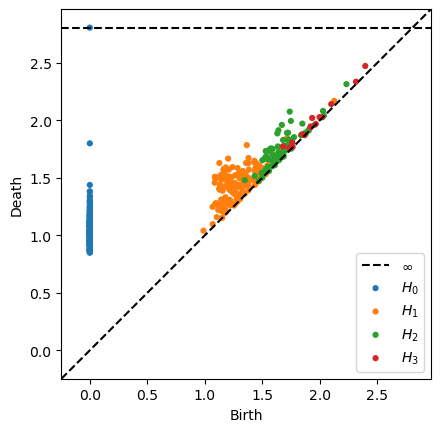

In [26]:
plot_diagrams(diagrams, show=True)


In [21]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

def sliding_window(x, m=5, stride=3):
    x = np.asarray(x, dtype=float)
    n = (len(x) - m) // stride + 1
    return np.array([x[i*stride:i*stride+m] for i in range(n)], dtype=np.float64)

def embed_and_standardize(gaps, m=10, stride=1):
    X = sliding_window(gaps, m=m, stride=stride)
    X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)  # coordinate-wise z-score
    return X

def run_ripser_and_plot(X, maxdim=3, title="", n_perm=200):
    kwargs = {"maxdim": maxdim}
    if n_perm is not None:
        kwargs["n_perm"] = n_perm  # approximation via landmarks

    res = ripser(X, **kwargs)
    diagrams = res["dgms"]

    plt.figure()
    plot_diagrams(diagrams, show=False)
    plt.title(title)
    plt.show()

    # lifetime summary
    for k in range(min(len(diagrams), maxdim+1)):
        D = diagrams[k]
        if len(D) == 0:
            print(f"H{k}: no features")
            continue
        life = D[:,1] - D[:,0]
        life = life[np.isfinite(life)]
        if len(life) == 0:
            print(f"H{k}: only infinite classes (common for H0)")
            continue
        print(f"H{k}: features={len(life)}, mean life={life.mean():.4f}, max life={life.max():.4f}")
    return diagrams


In [22]:
diagrams

[array([[0.        , 0.84814161],
        [0.        , 0.85237527],
        [0.        , 0.85500485],
        [0.        , 0.86232001],
        [0.        , 0.8638441 ],
        [0.        , 0.86431837],
        [0.        , 0.8704071 ],
        [0.        , 0.87090653],
        [0.        , 0.87179136],
        [0.        , 0.87201309],
        [0.        , 0.87205374],
        [0.        , 0.87263793],
        [0.        , 0.87567359],
        [0.        , 0.87886333],
        [0.        , 0.8795377 ],
        [0.        , 0.87992942],
        [0.        , 0.88267446],
        [0.        , 0.88536513],
        [0.        , 0.8917945 ],
        [0.        , 0.89577514],
        [0.        , 0.90005869],
        [0.        , 0.90403509],
        [0.        , 0.90533412],
        [0.        , 0.90701437],
        [0.        , 0.90801042],
        [0.        , 0.91230625],
        [0.        , 0.91339797],
        [0.        , 0.91348499],
        [0.        , 0.91424042],
        [0.   

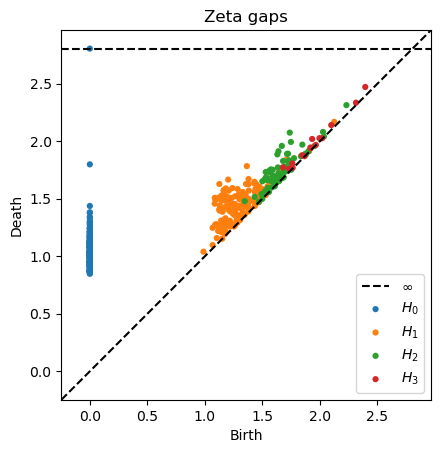

H0: features=199, mean life=1.0465, max life=1.7992
H1: features=153, mean life=0.1517, max life=0.5024
H2: features=71, mean life=0.0827, max life=0.3368
H3: features=15, mean life=0.0349, max life=0.0944


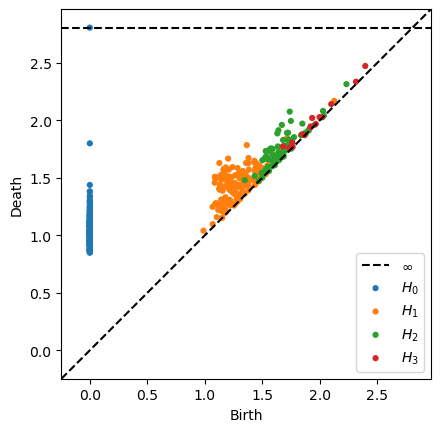

In [27]:
X = embed_and_standardize(unfolded_gaps, m=5, stride=3)
diagrams = run_ripser_and_plot(X, maxdim=3, title="Zeta gaps", n_perm=200)
plot_diagrams(diagrams, show=True)


In [32]:
gaps = np.asarray(unfolded_gaps, dtype=float)
N = len(gaps)

# 1) Shuffled gaps (same values, destroyed order)
gaps_shuffled = np.random.permutation(gaps)

# 2) i.i.d. random gaps
# If you want “no correlations” like a Poisson process, exponential spacings are the standard choice.
gaps_iid = np.random.exponential(scale=1.0, size=N)  # mean ~1

# 3) GUE spacings (approx)
def gue_spacings(N_spacings, matrix_size=2500, seed=None):
    rng = np.random.default_rng(seed)

    # random complex Hermitian matrix
    A = rng.normal(size=(matrix_size, matrix_size)) \
        + 1j * rng.normal(size=(matrix_size, matrix_size))
    H = (A + A.conj().T) / 2.0

    # eigenvalues
    eigvals = np.linalg.eigvalsh(H)
    eigvals.sort()

    # take bulk to avoid edge effects
    lo = matrix_size // 4
    hi = 3 * matrix_size // 4
    bulk = eigvals[lo:hi]

    # spacings
    spacings = np.diff(bulk)

    # normalize mean spacing to 1
    spacings = spacings / np.mean(spacings)

    if len(spacings) < N_spacings:
        raise ValueError("matrix_size too small for requested N_spacings")

    return spacings[:N_spacings]
gaps_gue = gue_spacings(N, matrix_size=2500, seed=0)


In [33]:
gaps_gue = gue_spacings(N, matrix_size=2500, seed=0)


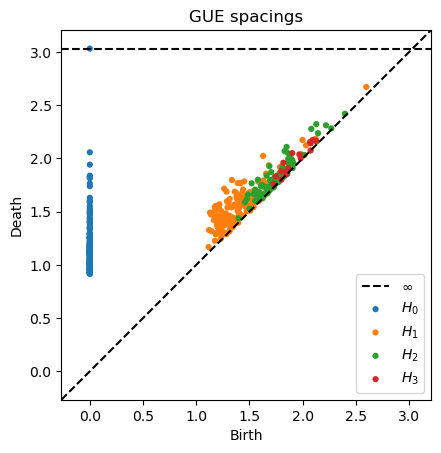

H0: features=199, mean life=1.1660, max life=2.0578
H1: features=174, mean life=0.1478, max life=0.4621
H2: features=84, mean life=0.0774, max life=0.2597
H3: features=16, mean life=0.0583, max life=0.1488


[array([[0.        , 0.91514832],
        [0.        , 0.91552967],
        [0.        , 0.92180794],
        [0.        , 0.92308342],
        [0.        , 0.92311388],
        [0.        , 0.92563534],
        [0.        , 0.92867637],
        [0.        , 0.93031543],
        [0.        , 0.93060887],
        [0.        , 0.93336695],
        [0.        , 0.93942088],
        [0.        , 0.93994886],
        [0.        , 0.94052559],
        [0.        , 0.94370759],
        [0.        , 0.9447633 ],
        [0.        , 0.94741279],
        [0.        , 0.95438862],
        [0.        , 0.95598358],
        [0.        , 0.95714527],
        [0.        , 0.95911622],
        [0.        , 0.96061057],
        [0.        , 0.96504349],
        [0.        , 0.96519792],
        [0.        , 0.96609622],
        [0.        , 0.96757275],
        [0.        , 0.97036231],
        [0.        , 0.97223788],
        [0.        , 0.97723854],
        [0.        , 0.97813165],
        [0.   

In [34]:
X_gue = embed_and_standardize(gaps_gue, m=5, stride=3)
run_ripser_and_plot(X_gue, maxdim=3, title="GUE spacings", n_perm=200)


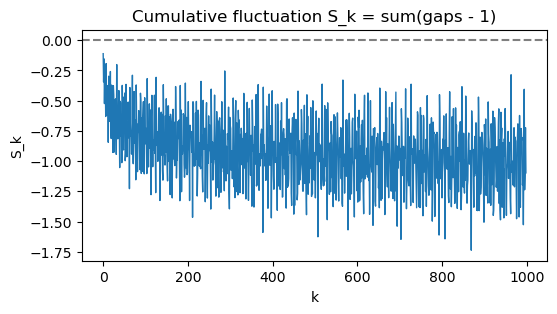

In [35]:
import numpy as np
import matplotlib.pyplot as plt

gaps = np.asarray(unfolded_gaps)

S = np.cumsum(gaps - 1)

plt.figure(figsize=(6,3))
plt.plot(S, lw=1)
plt.axhline(0, color='k', ls='--', alpha=0.5)
plt.title("Cumulative fluctuation S_k = sum(gaps - 1)")
plt.xlabel("k")
plt.ylabel("S_k")
plt.show()


In [36]:
def sliding_window(x, m=3, stride=5):
    x = np.asarray(x, dtype=float)
    n = (len(x) - m) // stride + 1
    return np.array([x[i*stride:i*stride+m] for i in range(n)])

X = sliding_window(S, m=3, stride=5)

# standardize
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)

X.shape


(200, 3)

In [37]:
def sliding_window(x, m=3, stride=5):
    x = np.asarray(x, dtype=float)
    n = (len(x) - m) // stride + 1
    return np.array([x[i*stride:i*stride+m] for i in range(n)])

X = sliding_window(S, m=3, stride=5)
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)

X.shape


(200, 3)

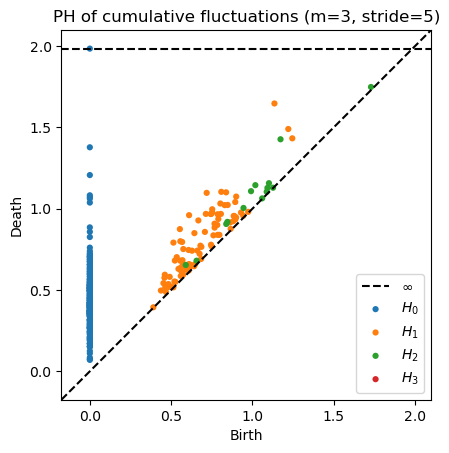

In [39]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

res = ripser(X, maxdim=3)
diagrams = res["dgms"]

plt.figure()
plot_diagrams(diagrams, show=False)
plt.title("PH of cumulative fluctuations (m=3, stride=5)")
plt.show()


In [40]:
H1 = diagrams[1]

lifetimes = H1[:,1] - H1[:,0]
lifetimes = lifetimes[np.isfinite(lifetimes)]

print("H1 features:", len(lifetimes))
print("max lifetime:", lifetimes.max() if len(lifetimes)>0 else None)
print("mean lifetime:", lifetimes.mean() if len(lifetimes)>0 else None)


H1 features: 89
max lifetime: 0.5117158889770508
mean lifetime: 0.11599694912353259


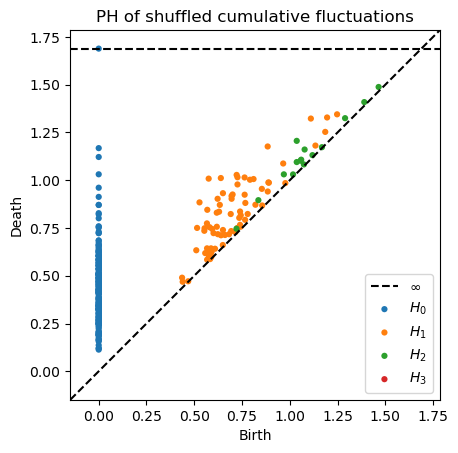

H1 features: 75
max lifetime: 0.4329054355621338
mean lifetime: 0.12573556343714395


In [42]:
S_shuf = np.random.permutation(S)

X_shuf = sliding_window(S_shuf, m=3, stride=5)
X_shuf = (X_shuf - X_shuf.mean(axis=0)) / (X_shuf.std(axis=0) + 1e-12)

res_shuf = ripser(X_shuf, maxdim=3)
diagrams_shuf = res_shuf["dgms"]

plt.figure()
plot_diagrams(diagrams_shuf, show=False)
plt.title("PH of shuffled cumulative fluctuations")
plt.show()

H1_shuf = diagrams_shuf[1]
life_shuf = H1_shuf[:,1] - H1_shuf[:,0]
life_shuf = life_shuf[np.isfinite(life_shuf)]

print("H1 features:", len(life_shuf))
print("max lifetime:", life_shuf.max() if len(life_shuf)>0 else None)
print("mean lifetime:", life_shuf.mean() if len(life_shuf)>0 else None)


In [43]:
def ordinal_window(x, m=3, stride=5):
    x = np.asarray(x)
    n = (len(x) - m) // stride + 1
    patterns = []
    for i in range(n):
        w = x[i*stride : i*stride + m]
        patterns.append(np.argsort(np.argsort(w)))
    return np.array(patterns)

X_ord = ordinal_window(S, m=3, stride=5)
X_ord.shape


(200, 3)

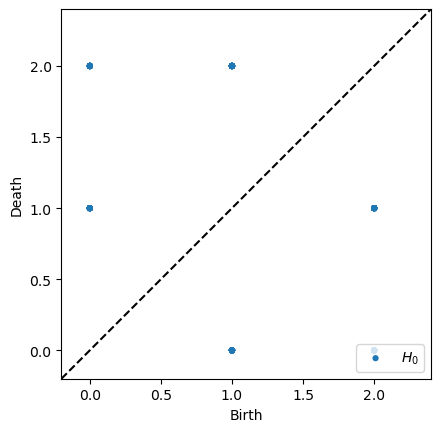

In [44]:
plt.figure()
plot_diagrams(X_ord, show=False)

In [45]:
X_ord.shape



(200, 3)

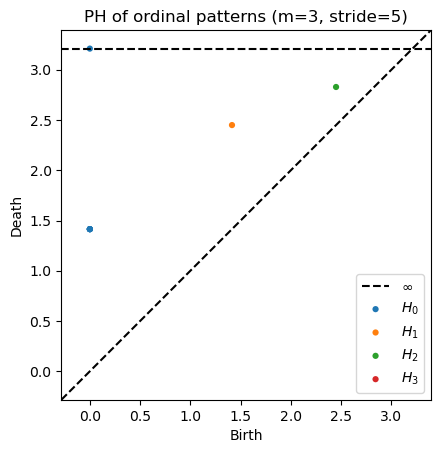

In [46]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

res_ord = ripser(X_ord, maxdim=3)
diagrams_ord = res_ord["dgms"]

plt.figure()
plot_diagrams(diagrams_ord, show=False)
plt.title("PH of ordinal patterns (m=3, stride=5)")
plt.show()


In [47]:
H1 = diagrams_ord[1]
lifetimes = H1[:,1] - H1[:,0]
lifetimes = lifetimes[np.isfinite(lifetimes)]

print("H1 features:", len(lifetimes))
print("max lifetime:", lifetimes.max() if len(lifetimes)>0 else None)
print("mean lifetime:", lifetimes.mean() if len(lifetimes)>0 else None)


H1 features: 1
max lifetime: 1.0352762937545776
mean lifetime: 1.0352762937545776


In [48]:
from collections import Counter
import numpy as np

def ordinal_patterns(x, m=3, stride=5):
    x = np.asarray(x)
    n = (len(x) - m) // stride + 1
    patterns = []
    for i in range(n):
        w = x[i*stride : i*stride + m]
        pat = tuple(np.argsort(np.argsort(w)))
        patterns.append(pat)
    return patterns

# ordinal patterns from cumulative fluctuations
patterns = ordinal_patterns(S, m=3, stride=5)

counts = Counter(patterns)
counts


Counter({(2, 1, 0): 51,
         (1, 0, 2): 36,
         (1, 2, 0): 34,
         (0, 2, 1): 30,
         (0, 1, 2): 26,
         (2, 0, 1): 23})

In [49]:
total = sum(counts.values())
freqs = {k: v/total for k,v in counts.items()}
freqs


{(2, 0, 1): 0.115,
 (1, 0, 2): 0.18,
 (1, 2, 0): 0.17,
 (0, 1, 2): 0.13,
 (2, 1, 0): 0.255,
 (0, 2, 1): 0.15}

In [50]:
counts


Counter({(2, 1, 0): 51,
         (1, 0, 2): 36,
         (1, 2, 0): 34,
         (0, 2, 1): 30,
         (0, 1, 2): 26,
         (2, 0, 1): 23})

In [51]:
# shuffled baseline
S_shuf = np.random.permutation(S)

patterns_shuf = ordinal_patterns(S_shuf, m=3, stride=5)
counts_shuf = Counter(patterns_shuf)

total_shuf = sum(counts_shuf.values())
freqs_shuf = {k: v/total_shuf for k,v in counts_shuf.items()}

counts_shuf, freqs_shuf


(Counter({(2, 1, 0): 39,
          (1, 2, 0): 36,
          (2, 0, 1): 33,
          (0, 1, 2): 32,
          (1, 0, 2): 31,
          (0, 2, 1): 29}),
 {(0, 1, 2): 0.16,
  (2, 0, 1): 0.165,
  (1, 2, 0): 0.18,
  (2, 1, 0): 0.195,
  (1, 0, 2): 0.155,
  (0, 2, 1): 0.145})

In [52]:
freqs_shuf


{(0, 1, 2): 0.16,
 (2, 0, 1): 0.165,
 (1, 2, 0): 0.18,
 (2, 1, 0): 0.195,
 (1, 0, 2): 0.155,
 (0, 2, 1): 0.145}